<a href="https://colab.research.google.com/github/IrfanChairurrachman/Dicoding-ML-Pemula/blob/master/Irfan_DicodingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-20 13:08:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.63MB/s    in 54s     

2020-07-20 13:09:12 (5.71 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
import zipfile

# Ekstrak zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Menggunakan dan Mengecek GPU

Cara menggunakan GPU pada Google Colab:

- Edit -> Notebook settings
- Pilih GPU pada "Hardware Accelerator"


In [ ]:
# Cek apakah GPU terhubung atau tidak
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU tidak ditemukan')
print('GPU terhubung: {}'.format(device_name))

GPU terhubung: /device:GPU:0


In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi di atas 96%, hentikan pelatihan!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
dir_utama = os.path.join('/tmp/rockpaperscissors/rps-cv-images')

print(os.listdir(dir_utama))

['rock', 'README_rpc-cv-images.txt', 'paper', 'scissors']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4 # Membagi Data Validasi 40% dan Training 60%
)

In [ ]:
batch_size = 128

generator_latih = train_datagen.flow_from_directory(
    dir_utama,
    target_size = (150,150), # Besar Input harus sama besar dan dijadikan 150x150
    class_mode = 'categorical', # Menggunakan lebih dari 2 kelas
    batch_size = batch_size,
    subset = 'training' # Penentuan sebagai data latih
)

generator_validasi = train_datagen.flow_from_directory(
    dir_utama, # Direktori sama dengan generator latih karena pembagian dilakukan oleh Generator
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation' # Penentuan sebagai data latih
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Besar masukan dibuat sebesar 150x150 dengan warna 3 bytes
    # Konvulasi pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvolusi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Meratakan input menjadi 1 dimensi
    tf.keras.layers.Flatten(),
    # Menggunakan Dropout sebesar 50%
    tf.keras.layers.Dropout(0.5), 
    # 512 neuron terhadap hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 neuron/kelas pada output layer
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', # Opmitizer RMSprop
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
history = model.fit(generator_latih, 
                    epochs = 30, 
                    steps_per_epoch = 1314//batch_size, 
                    validation_data = generator_validasi, 
                    verbose = 1, 
                    validation_steps = 874//batch_size,
                    callbacks = [callbacks])

Epoch 1/30
10/10 [==============================] - 16s 2s/step - loss: 1.4196 - accuracy: 0.3567 - val_loss: 1.1011 - val_accuracy: 0.3229
Epoch 2/30
10/10 [==============================] - 16s 2s/step - loss: 1.0971 - accuracy: 0.3592 - val_loss: 1.0151 - val_accuracy: 0.5234
Epoch 3/30
10/10 [==============================] - 16s 2s/step - loss: 1.0903 - accuracy: 0.4191 - val_loss: 1.0091 - val_accuracy: 0.6081
Epoch 4/30
10/10 [==============================] - 16s 2s/step - loss: 1.0201 - accuracy: 0.5270 - val_loss: 1.1873 - val_accuracy: 0.4336
Epoch 5/30
10/10 [==============================] - 16s 2s/step - loss: 0.9597 - accuracy: 0.5911 - val_loss: 0.6473 - val_accuracy: 0.7982
Epoch 6/30
10/10 [==============================] - 16s 2s/step - loss: 0.6536 - accuracy: 0.7639 - val_loss: 0.6376 - val_accuracy: 0.7617
Epoch 7/30
10/10 [==============================] - 17s 2s/step - loss: 0.4399 - accuracy: 0.8314 - val_loss: 0.2747 - val_accuracy: 0.9115
Epoch 8/30
10/10 [==

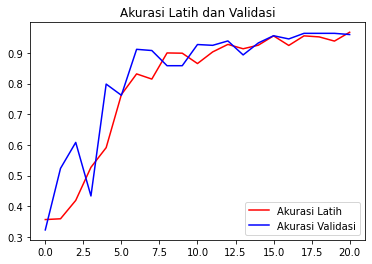

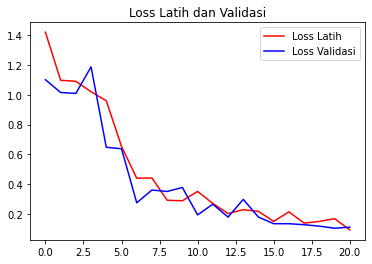

<Figure size 432x288 with 0 Axes>

In [ ]:
# Melakukan plot terhadap akurasi latih dan validasi untuk melihat goodfit atau tidak

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Latih')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Latih dan Validasi')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Loss Latih')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Latih dan Validasi')
plt.legend(loc=0)
plt.figure()

plt.show()

Using TensorFlow backend.


Saving batu2.jpg to batu2.jpg


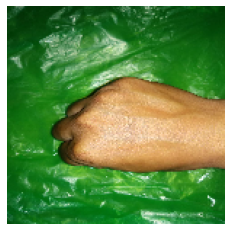

[[0. 1. 0.]]
Batu


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Prediksi dengan mengunggah gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes) # Prediksi ketiga kelas tersimpan dalam array
  # Keluaran Prediksi
  if classes[0][0] == 1:
    print('Kertas')
  elif classes[0][1] == 1:
    print('Batu')
  else:
    print('Gunting')